<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Guided-GradCam" data-toc-modified-id="Guided-GradCam-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Guided GradCam</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ensemble</a></span></li></ul></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIFAR10</a></span><ul class="toc-item"><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ensemble</a></span></li></ul></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>MNIST</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')

from dataload import mnist_load, cifar10_load
from saliency.attribution_methods import GuidedGradCAM
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


In [4]:
layers = ['Conv1','BatchNorm1','ReLU1','MaxPool1','Conv2','BatchNorm2','ReLU2','MaxPool2','Conv3','BatchNorm3','ReLU3','MaxPool3']

# Guided GradCam

<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/GuidedGradCAM.png?raw=true" width="600">

In [5]:
GBGC_mnist = GuidedGradCAM(mnist_model)
GBGC_cifar10 = GuidedGradCAM(cifar10_model)

# MNIST

In [6]:
outputs_layer = []

for layer_idx in range(len(layers)):
    outputs, probs, preds = GBGC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=layer_idx)
    outputs_layer.append(outputs)

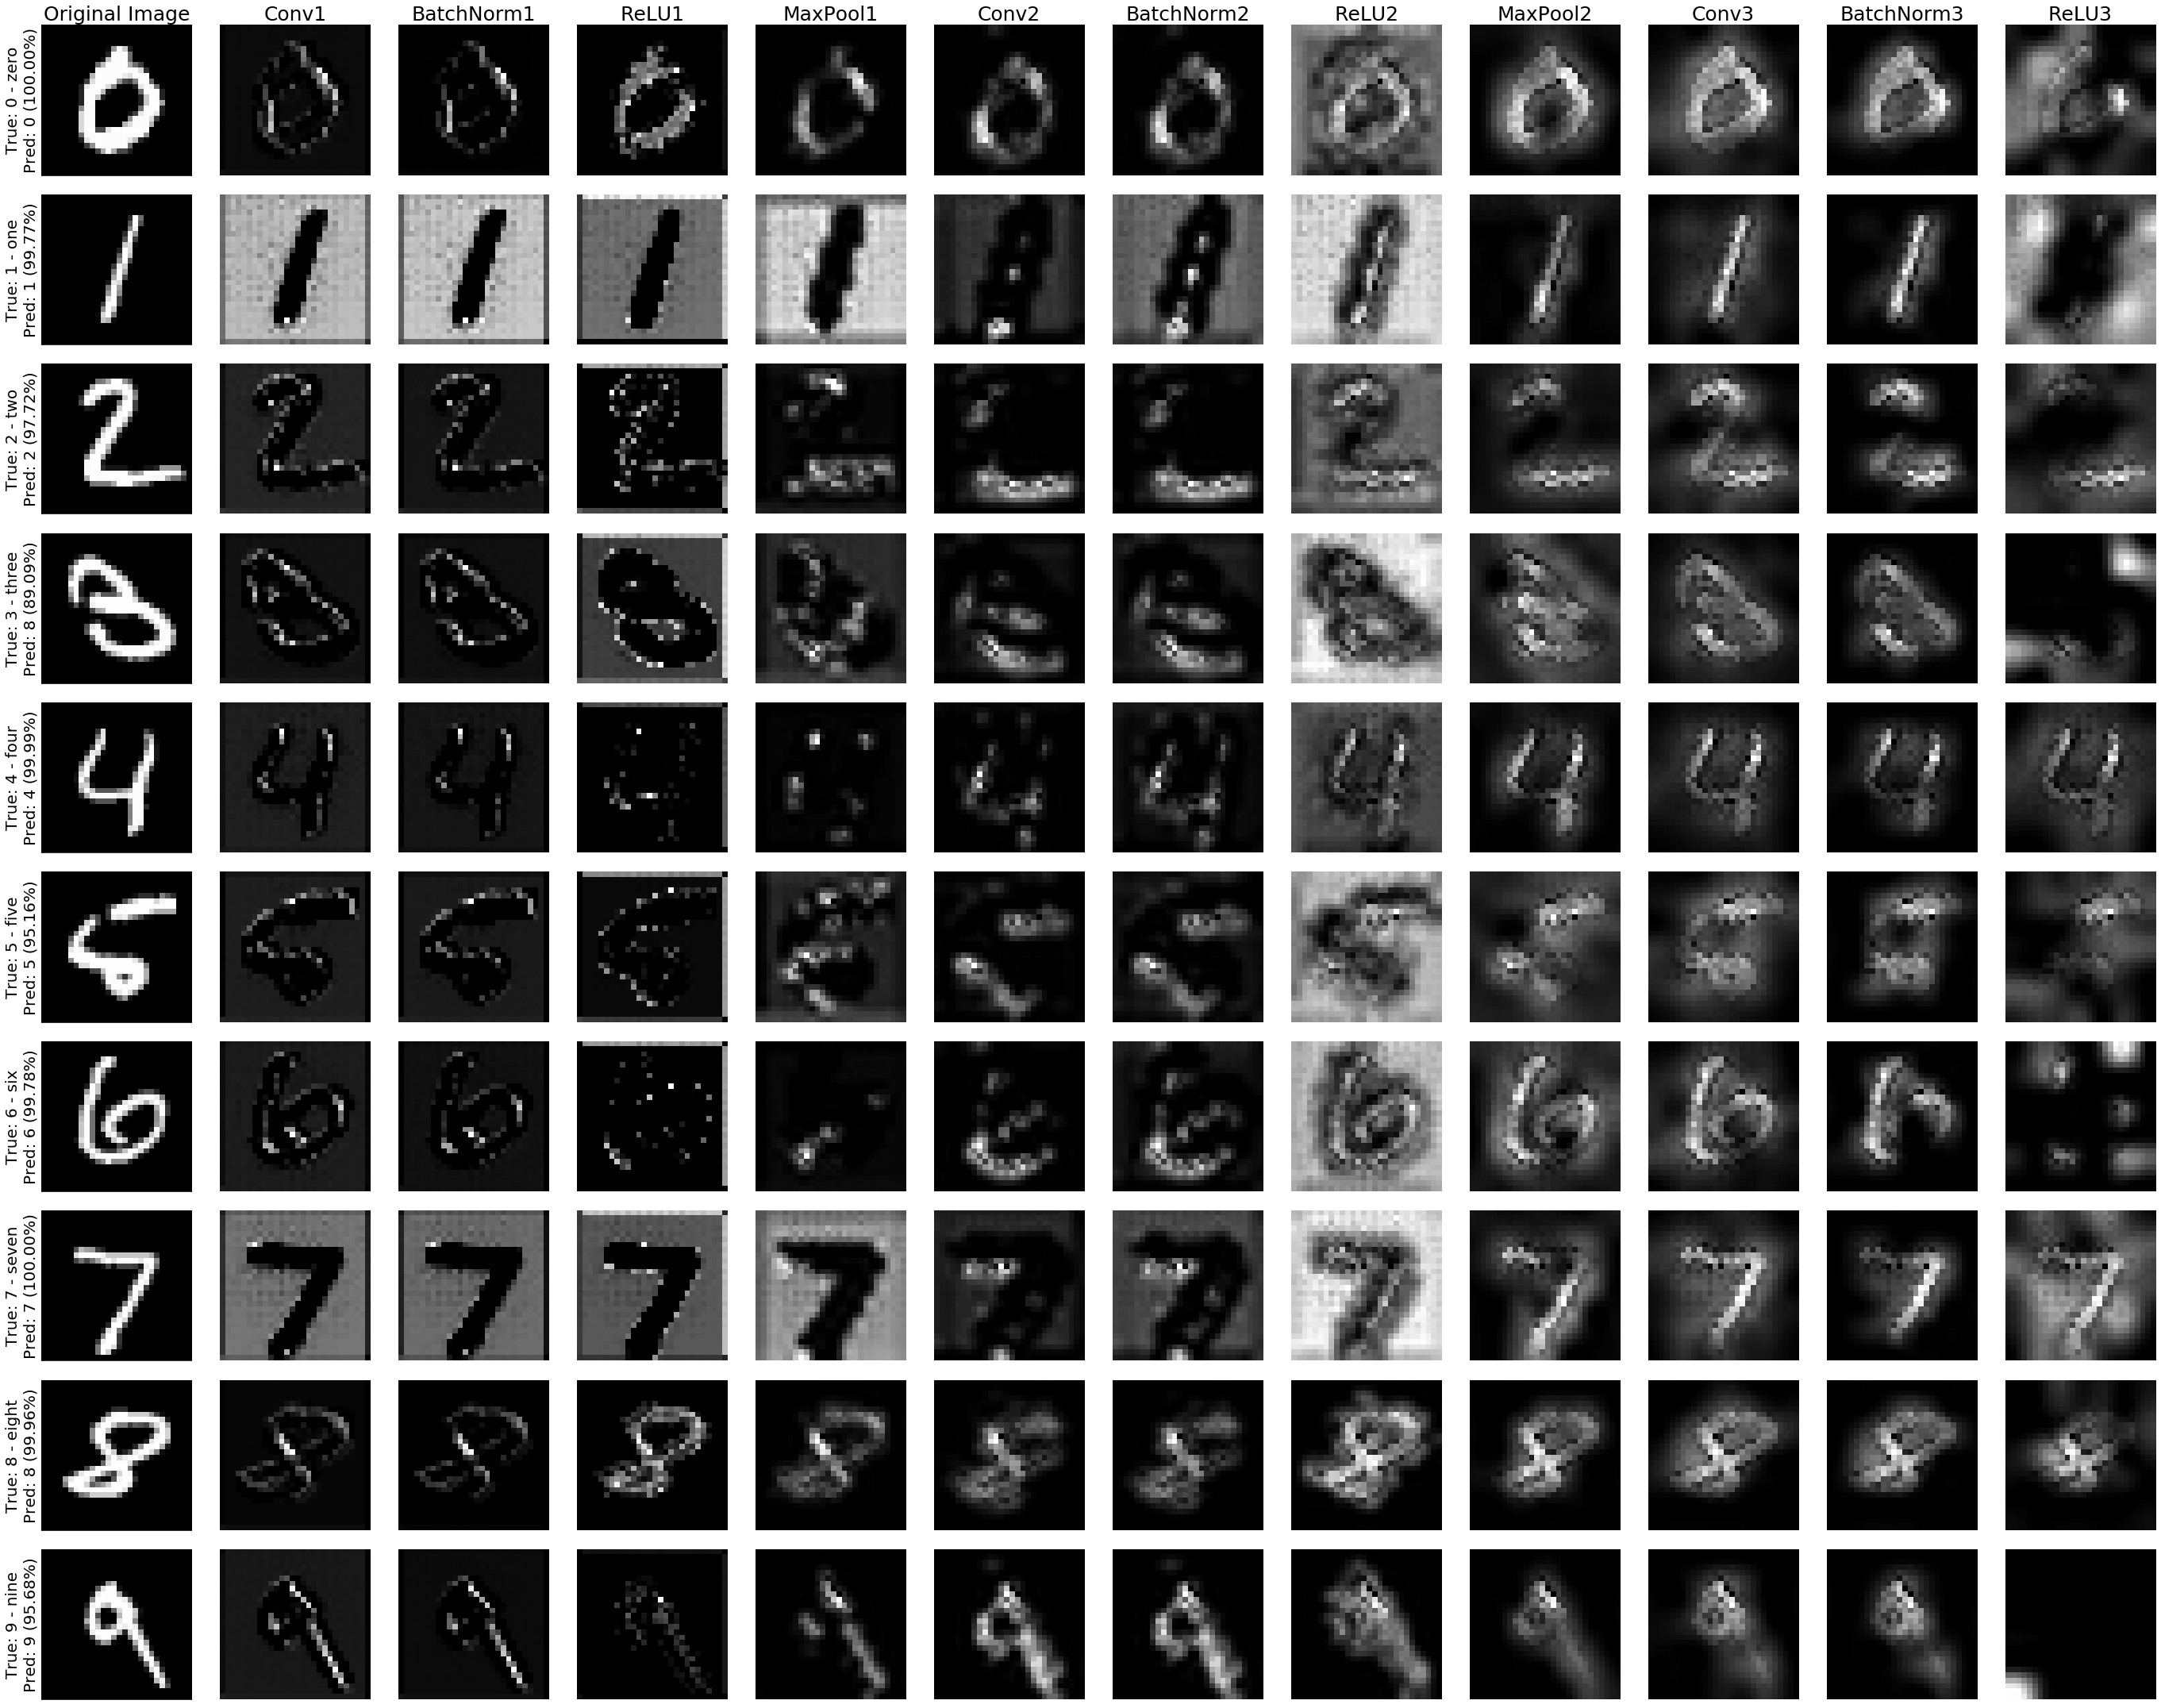

In [7]:
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    outputs_layer,
                    probs,
                    preds,
                    mnist_classes,
                    layers,
                    target,
                    col=len(layers), row=10, size=(40,30), labelsize=20, fontsize=25)

## Ensemble

In [8]:
# Guided GradCAM
outputs, probs, preds = GBGC_mnist.generate_image(pre_images_mnist, original_targets_mnist, layer=8)

# ensemble
n = 50
sigma = 2
# Guided GradCAM + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, GBGC_mnist, layer=8)
# Guided GradCAM + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, GBGC_mnist, layer=8)
# Guided GradCAM + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, GBGC_mnist, layer=8)

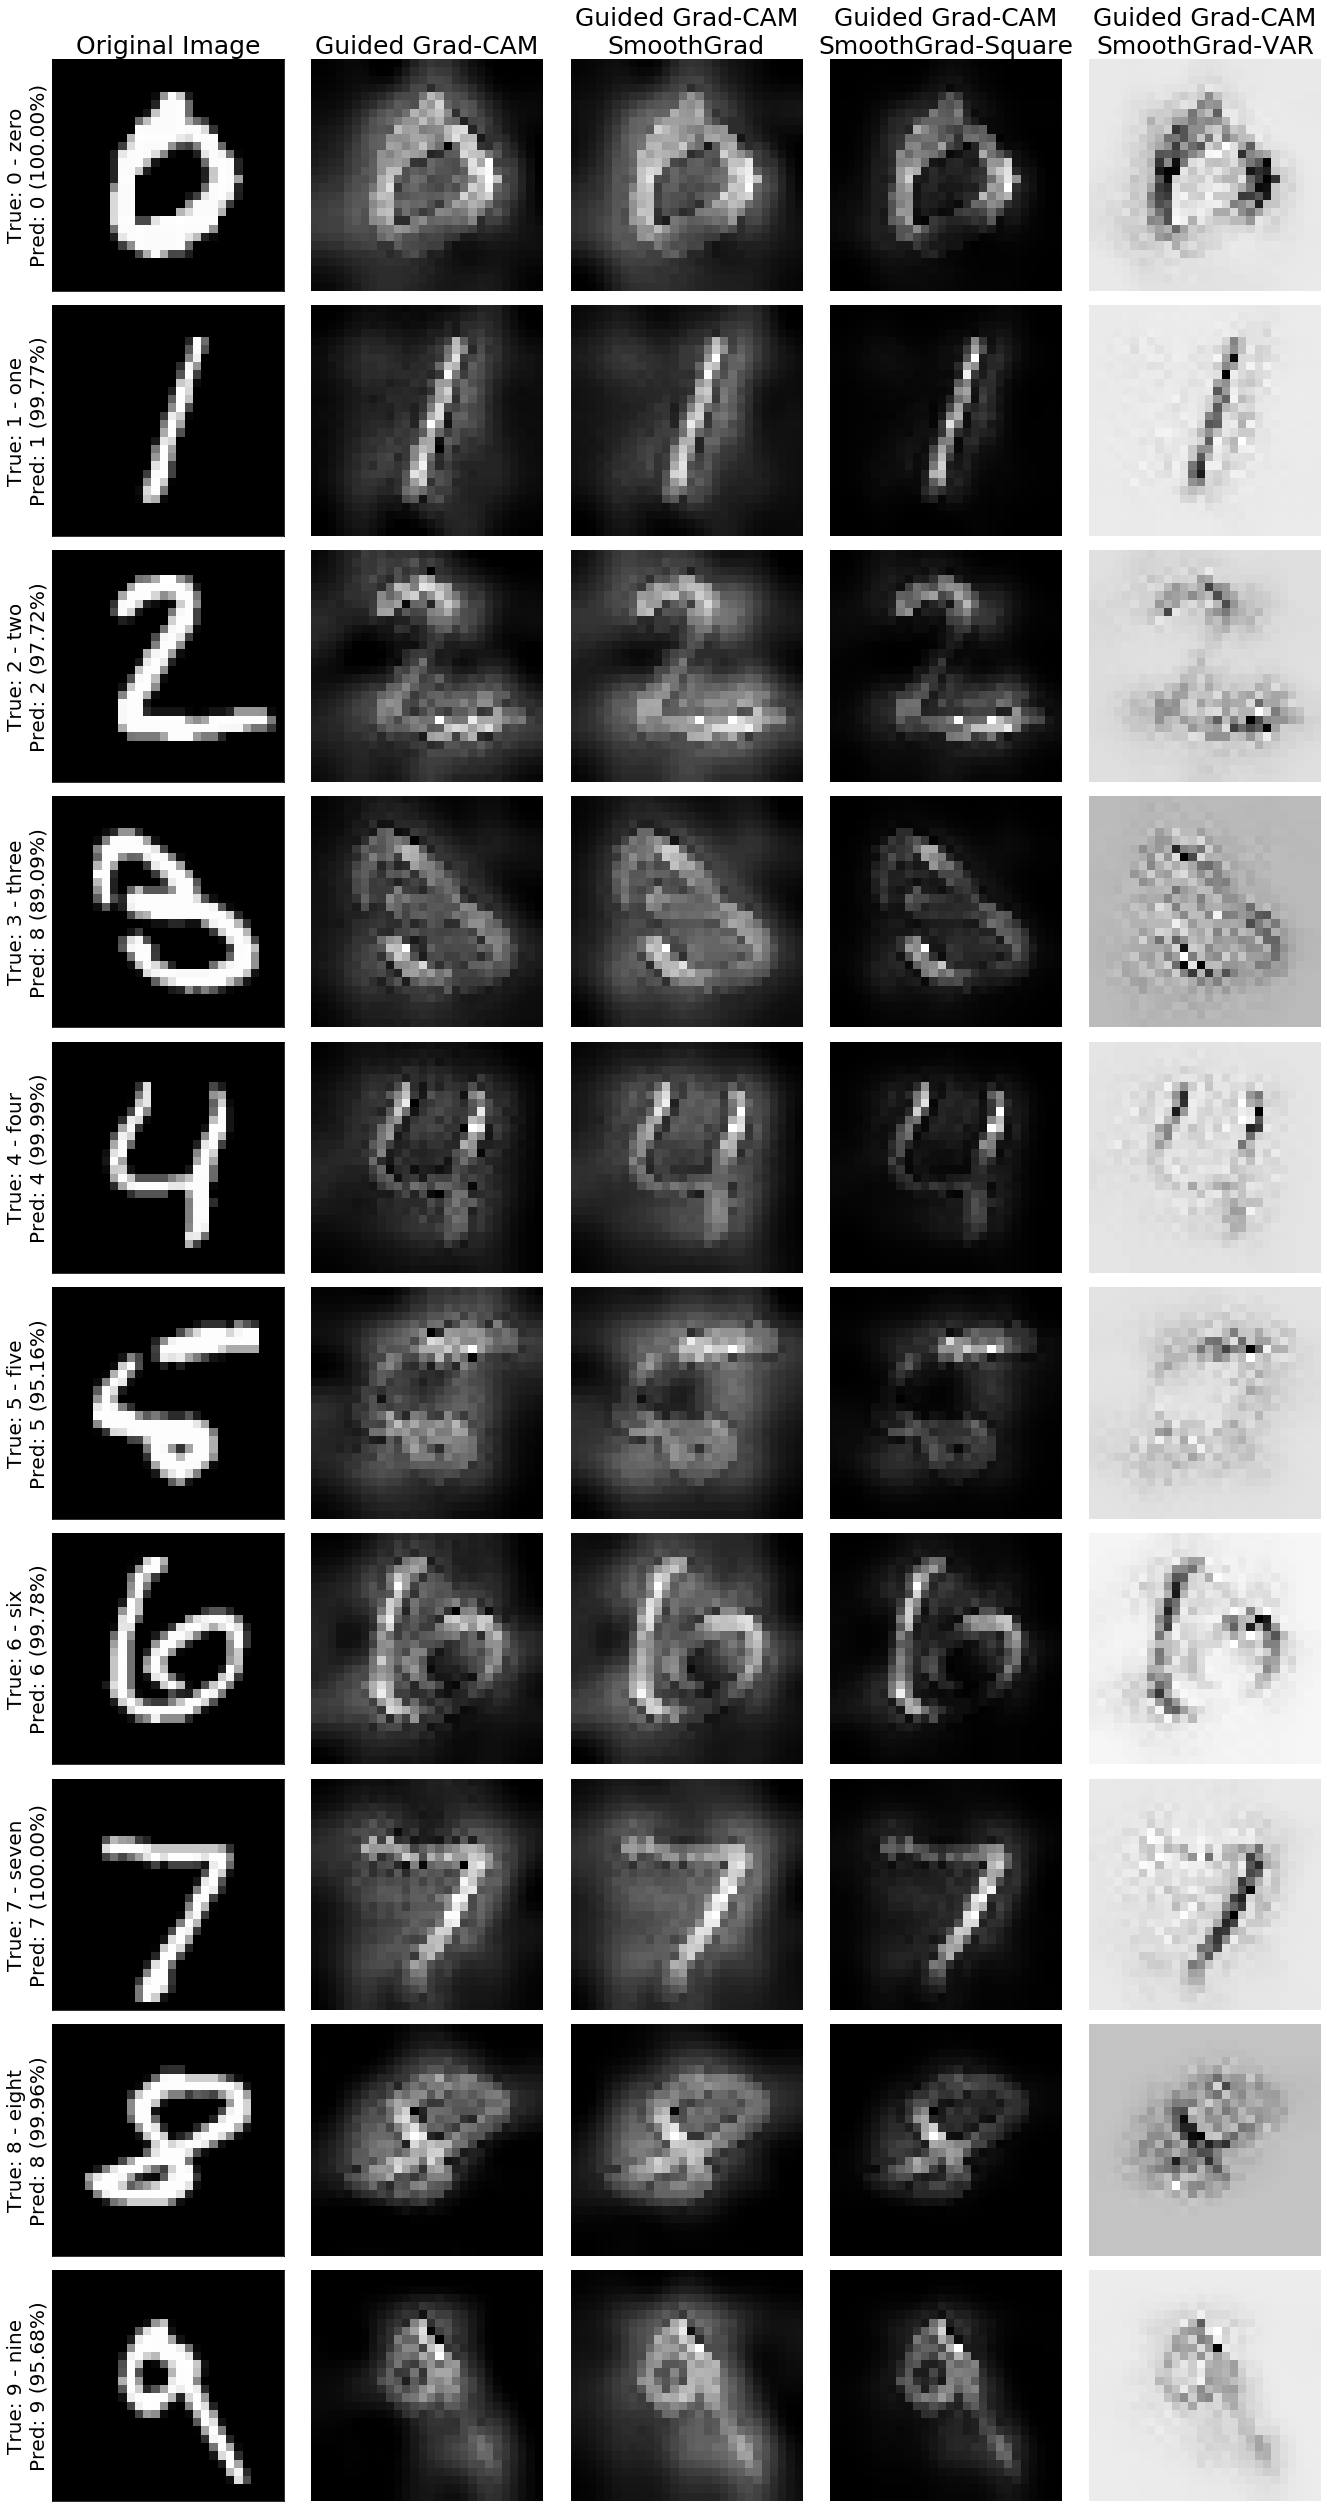

In [9]:
names = ['Guided Grad-CAM',
         'Guided Grad-CAM\nSmoothGrad','Guided Grad-CAM\nSmoothGrad-Square','Guided Grad-CAM\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# CIFAR10

In [10]:
outputs_layer = []

for layer_idx in range(len(layers)):
    outputs, probs, preds = GBGC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=layer_idx)
    outputs_layer.append(outputs)

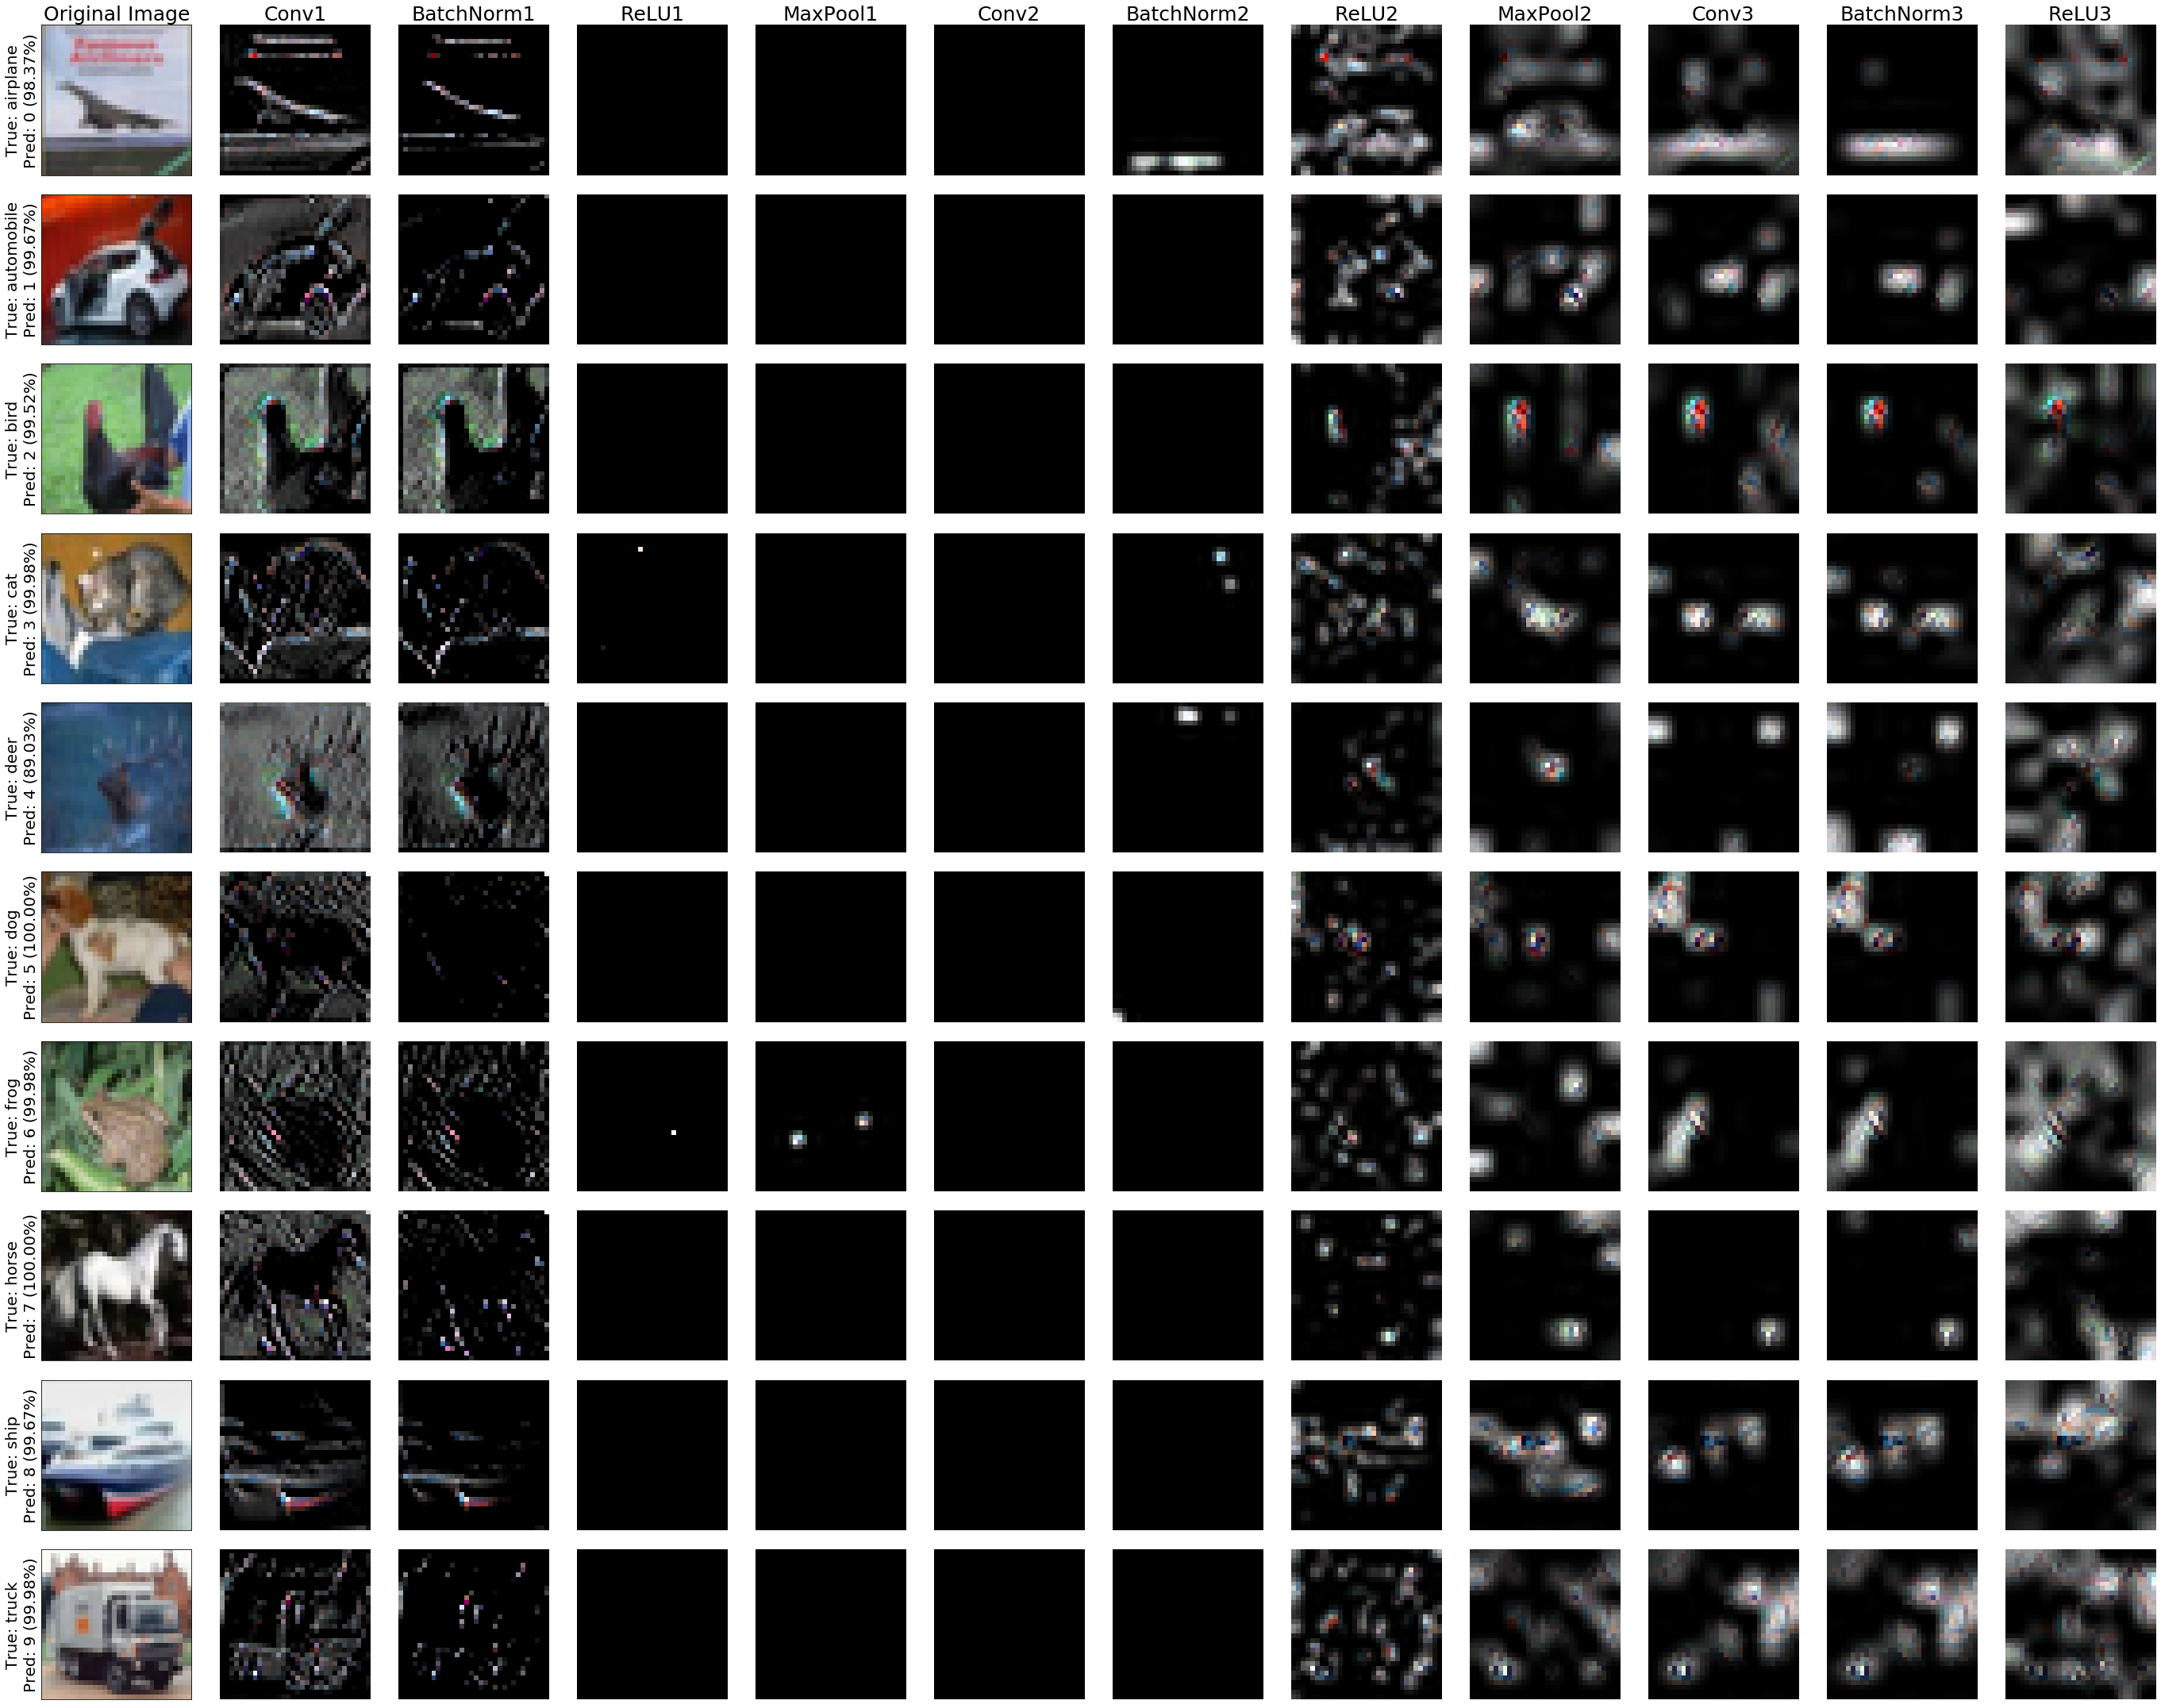

In [11]:
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    outputs_layer,
                    probs,
                    preds,
                    cifar10_classes,
                    layers,
                    target,
                    col=len(layers), row=10, size=(40,30), labelsize=20, fontsize=25)

## Ensemble

In [12]:
# Guided GradCAM
outputs, probs, preds = GBGC_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, layer=8)

# ensemble
n = 50
sigma = 2
# Guided GradCAM + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GBGC_cifar10, layer=8)
# Guided GradCAM + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GBGC_cifar10, layer=8)
# Guided GradCAM + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, GBGC_cifar10, layer=8)

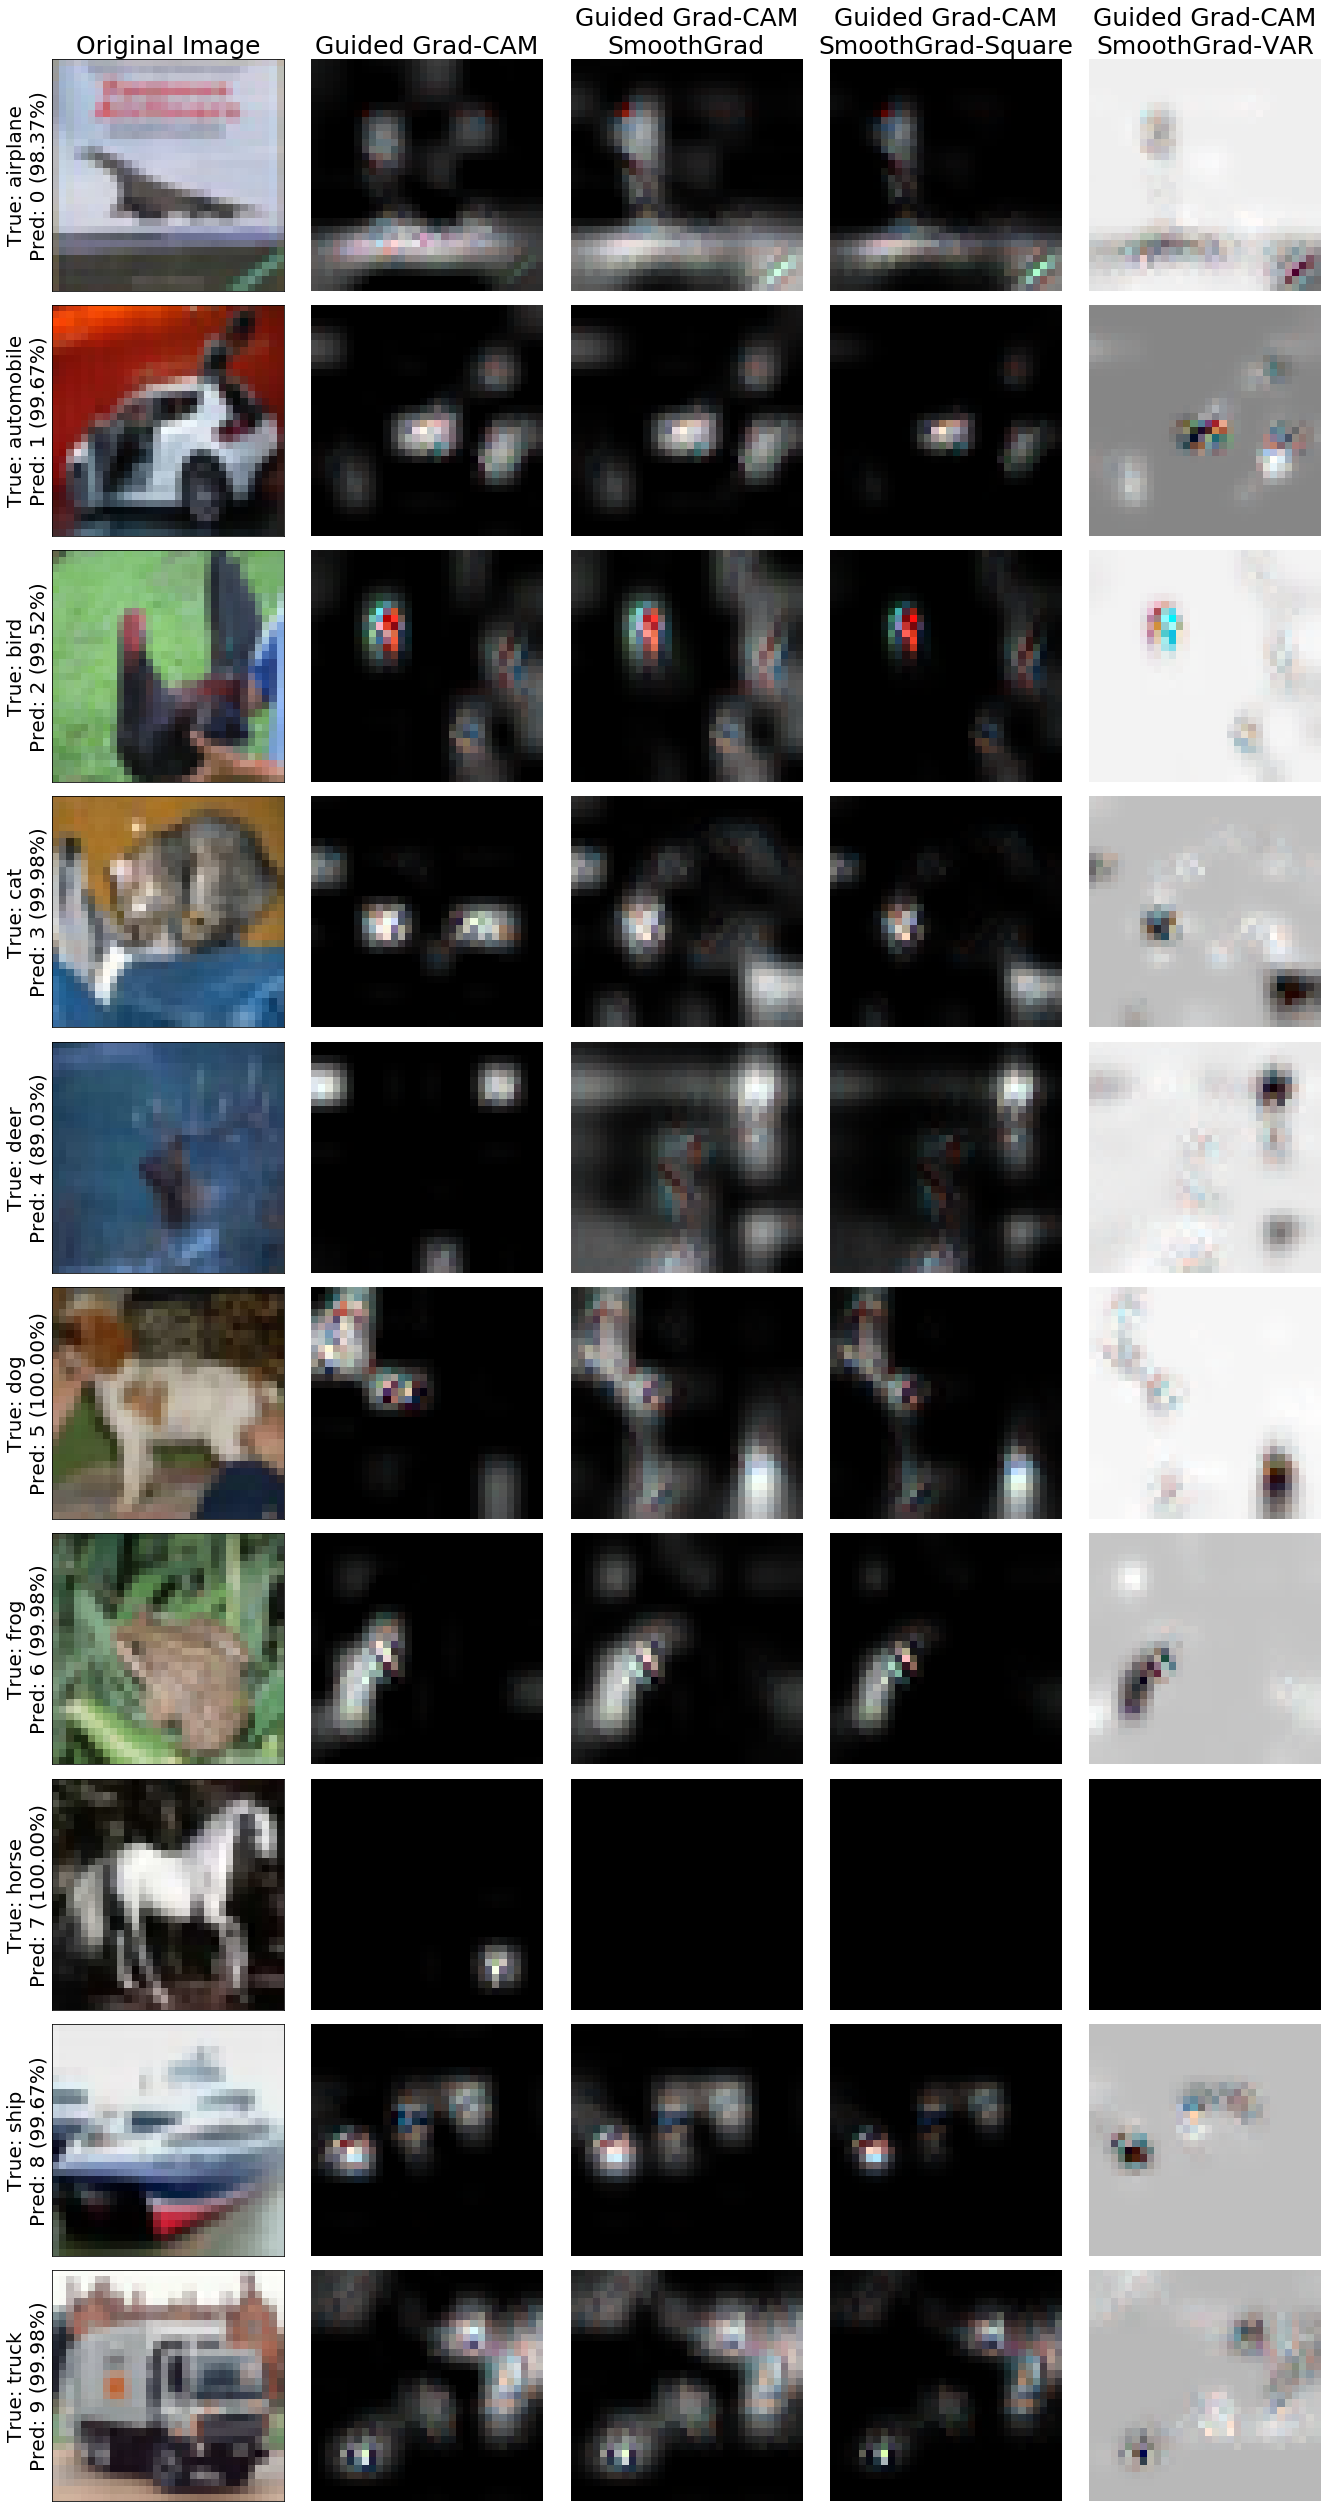

In [13]:
names = ['Guided Grad-CAM',
         'Guided Grad-CAM\nSmoothGrad','Guided Grad-CAM\nSmoothGrad-Square','Guided Grad-CAM\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [18]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [19]:
GBGC_mnist.save_saliency_map(trainloader, '../saliency_maps/[mnist]GBGC_train.hdf5')
GBGC_mnist.save_saliency_map(validloader, '../saliency_maps/[mnist]GBGC_valid.hdf5')
GBGC_mnist.save_saliency_map(testloader, '../saliency_maps/[mnist]GBGC_test.hdf5')

Vanilla Backprop: 100%|██████████████████████████████████████████████████████████████| 375/375 [06:50<00:00,  1.19s/it]


Save saliency maps


Vanilla Backprop: 100%|████████████████████████████████████████████████████████████████| 94/94 [01:38<00:00,  1.05it/s]


Save saliency maps


Vanilla Backprop: 100%|████████████████████████████████████████████████████████████████| 79/79 [01:10<00:00,  1.39it/s]


Save saliency maps


## MNIST

In [6]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [7]:
GBGC_cifar10.save_saliency_map(trainloader, '../saliency_maps/[cifar10]GBGC_train.hdf5')
GBGC_cifar10.save_saliency_map(validloader, '../saliency_maps/[cifar10]GBGC_valid.hdf5')
GBGC_cifar10.save_saliency_map(testloader, '../saliency_maps/[cifar10]GBGC_test.hdf5')

Vanilla Backprop: 100%|██████████████████████████████████████████████████████████████| 313/313 [08:35<00:00,  1.65s/it]


Save saliency maps
